# Customizing module reprs in IPython

When notebooks become modules, you can do some playful things with custom [IPython reprs](https://ipython.org/ipython-doc/3/config/integrating.html).

On an `object`, IPython will recognize attributes beginning with `_repr_*_` if `*` is in values like `html`, `markdown`, `svg`, `png`

In [1]:
    __import__(__name__)

<module '__main__'>

`__import__('__main__')` wraps in the current IPython session as a module.  But, the repr does not inform the author much.

In [2]:
    Ø = '__main__' == __name__
    if Ø:
        import deathbeds.__IPython_repr__ as reprs
        print(reprs)

<module 'deathbeds.2018-07-09-IPython-reprs' from '/Users/tonyfast/deathbeds.github.io/deathbeds/2018-07-09-IPython-reprs.ipynb'>


The module's imported representation informs the author about its name and location.  This is most useful for the computer, and rarely the author.

## Individual reprs

If we name function as the names for custom [`IPython reprs`](https://ipython.org/ipython-doc/3/config/integrating.html).

### Image reprs

#### PNG

In [3]:
    from matplotlib.pyplot import gcf
    from base64 import b64decode, b64encode
    import pandas as pd

    df = pd.util.testing.makeDataFrame()
    with __import__('io').BytesIO() as bit:
        df.plot(); gcf().savefig(bit, format='png')
        img = bit.getvalue()

    _repr_png_ = lambda: b64encode(img).decode('utf-8')

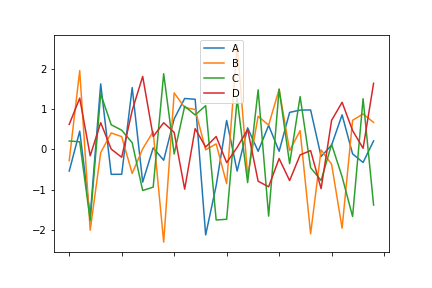

In [4]:
    module = __import__(__name__)
    assert isinstance(module, __import__('types').ModuleType)
    module # There is a png in the repr.

#### JPG

In [5]:
    with __import__('io').BytesIO() as jpg:
        df.plot(); gcf().savefig(jpg, format='jpg')
        jpg = jpg.getvalue()
        _repr_jpeg_ = lambda: b64encode(jpg).decode('utf-8')

#### SVG

In [6]:
    with __import__('io').BytesIO() as svg:
        df.plot(); gcf().savefig(svg, format='svg')
        svg = svg.getvalue()
        _repr_svg_ = lambda: svg.decode('utf-8')

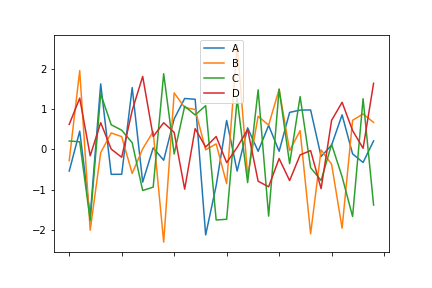

In [7]:
    __import__(__name__)

### Markdown repr

An author could prettify their reports with markdown.  We had to start with images because markdown will take precedence.

In [8]:
    _repr_markdown_ = lambda: f"""# I am a markdown repr
    
    The `_repr_markdown_` function does recieve a self argument or take and arguments. And,
    conveniently we have access to the scope of `{reprs}`
    """

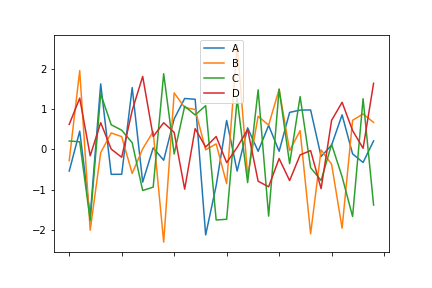

In [9]:
    __import__(__name__) # There is a md & images in the repr.

* The reprs compound with each other.  Markdown reprs take precedence over image reprs.  Nevertheless, we will see in our analysis that indeed the `png` and `markdown` reprs are stored in the notebook format.

## Analysis

After running this post, we can load in the saved state of the notebook.

In [13]:
    if Ø:
        from nbformat.v4 import reads
        from pathlib import Path

        df = pd.read_json(reprs.__file__, typ='Series').pipe(
            lambda s: pd.DataFrame(s.loc['cells']))

        outputs = df['outputs'].apply(pd.Series).set_index(df['source'].str.join('\n')).stack()

We can observe the incremental addition of new reprs to the output of our notebook.

In [17]:
    Ø and outputs.apply(lambda x: x.get('data', None)).dropna().apply(dict.keys).apply(list).apply(pd.Series).fillna('')

,,0,1,2,3,4
source,,,,,,
__import__(__name__),0,text/plain,,,,
"module = __import__(__name__)\n\n assert isinstance(module, __import__('types').ModuleType)\n\n module # There is a png in the repr.",0,image/png,text/plain,,,
__import__(__name__),0,image/jpeg,image/png,image/svg+xml,text/plain,
__import__(__name__) # There is a md & images in the repr.,0,image/jpeg,image/png,image/svg+xml,text/markdown,text/plain
"Ø and outputs.apply(lambda x: x.get('data', None)).dropna().apply(dict.keys).apply(list).apply(pd.Series).fillna('')",0,text/html,text/plain,,,
if Ø: import disqus,0,text/html,text/plain,,,


In [12]:
    if Ø: import disqus